# Proyek Analisis Data: [E-commerce Public Dataset]
- **Nama:** Cika Faza Fitra Akhirunnisa
- **Email:**  cikafaza@gmail.com
- **ID Dicoding:** cikafaza

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1**: Kategori produk mana saja yang mendapatkan jumlah penjualan terbaik dan jumlah penjualan terburuk berdasarkan jumlah order?
- **Pertanyaan 2:** Kapan perusahaan mengalami penjualan tertinggi berdasarkan jumlah order? dan apakah penjualan mengalami kenaikan terus menerus dari waktu ke waktu?
-  **Pertanyaan 3:** Jumlah customer paling banyak berada di kota mana saja?




##**Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Data Wrangling**

## Gathering Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# opening datasets individually
orders = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/orders_dataset.csv')
items = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/order_items_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/products_dataset.csv')
payments = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/order_payments_dataset.csv')
reviews = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/order_reviews_dataset.csv')
customers = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/customers_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/sellers_dataset.csv')
geolocation = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/geolocation_dataset.csv')
category = pd.read_csv('https://raw.githubusercontent.com/cikafaza/Proyek-Data-Analis-Dicoding/master/product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [4]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Assessing Data

####1. Data "customers"

In [13]:
data['customers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### semua tipe data "customers" sudah sesuai

In [14]:
# To calculate the number of missing values in a dataset
data['customers'].isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


pada data "customer" tidak ada missing value

In [15]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['customers'].duplicated().sum()}')

Duplicate count: 0


pada data "customers" tidak ada yang duplicate

####2. Data "geo"

In [16]:
data['geo'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
# To calculate the number of missing values in a dataset
data['geo'].isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [18]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['geo'].duplicated().sum()}')

Duplicate count: 261831


terdapat data yang duplicate sebanyak 261831

####3. Data "items"

In [19]:
data['items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


terdapat data type error di shipping_limit_date

In [20]:
# To calculate the number of missing values in a dataset
data['items'].isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


tidak ditemukan missing value di data "items"

In [21]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['items'].duplicated().sum()}')

Duplicate count: 0


tidak ada data duplicate di data "items"

####4. Data "payments"

In [22]:
data['payments'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


tidak ada data type yang error di data "payments"

In [23]:
# To calculate the number of missing values in a dataset
data['payments'].isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


tidak ada missing value di data "payments"

In [24]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['payments'].duplicated().sum()}')

Duplicate count: 0


tidak ada data duplicate di data"payments"

####5. Data "reviews"

In [25]:
data['reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terdapat data type error pada review_creation_date dan review_answer_timestamp

In [26]:
# To calculate the number of missing values in a dataset
data['reviews'].isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


terdapat missing value di data review_comment_title dan review_comment_message

In [27]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['reviews'].duplicated().sum()}')

Duplicate count: 0


tidak terdapat data duplicate di data "reviews"

####6. Data "orders"

In [28]:
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat dat type error pada order_delivered_carrier_date, order_delivered_customer_date, order_purchase_timestamp, dan order_approved_at, order_estimated_delivery_date. Seharusnya tipe data datetime

In [29]:
# To calculate the number of missing values in a dataset
data['orders'].isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


tedapat missing value di order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

In [30]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['orders'].duplicated().sum()}')

Duplicate count: 0


tidak ada data duplicate di data"orders"

####7. Data "products"

In [31]:
data['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
# To calculate the number of missing values in a dataset
data['products'].isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


terdapat beberapa missing value pada data"products" kecuali dibagian product_id

In [33]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['products'].duplicated().sum()}')

Duplicate count: 0


tidak ada data duplicate di data"products"

####8. Data "sellers"

In [34]:
data['sellers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


tidak ada data type yang error

In [35]:
# To calculate the number of missing values in a dataset
data['sellers'].isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


tidak ada missing value pada data "sellers"

In [36]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['sellers'].duplicated().sum()}')

Duplicate count: 0


tidak ada data duplicate di data "sellers"

####9. Data "category"

In [37]:
data['category'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


data type tidak ada yang error

In [38]:
# To calculate the number of missing values in a dataset
data['category'].isna().sum()

,0
product_category_name,0
product_category_name_english,0


tidak ada missing value di data "category"

In [39]:
# To calculate the total number of duplicate rows in a dataset
print(f'Duplicate count: {data['category'].duplicated().sum()}')

Duplicate count: 0


tidak ada data duplicate di data "category"

## Cleaning Data

###1. Data type error in "items"

In [40]:
# To access the columns that will be modified
datetime_columns = ['shipping_limit_date']

# To convert the previously accessed columns to datetime data type
for column in datetime_columns:
  items[column] = pd.to_datetime(items[column])

In [41]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


###2. Data type error in "orders"

In [42]:
# To access the columns that will be modified
datetime_columns = ['order_estimated_delivery_date','order_delivered_carrier_date', 'order_delivered_customer_date', 'order_approved_at', 'order_purchase_timestamp']

# To convert the previously accessed columns to datetime data type
for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [43]:
# To change the timestamp format in the `order_approved_at` column
orders['order_approved_at'] = orders['order_approved_at'].dt.strftime('%Y-%m-%d')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

In [44]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


###3. Data type error in "reviews"

In [45]:
# To access the columns that will be modified
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

# To convert the previously accessed columns to datetime data type
for column in datetime_columns:
  reviews[column] = pd.to_datetime(reviews[column])

In [46]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


###4. Missing Values in "products"

In [47]:
products[products.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [48]:
products[products.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
products.dropna(inplace=True)

In [50]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


###5. Null values in the order_approved_at column

In [51]:
# Filling missing values in 'order_approved_at' with the earliest available date.
min_date = orders['order_approved_at'].min()
orders['order_approved_at'].fillna(min_date, inplace=True)
orders.isna().sum()

/tmp/ipython-input-116366568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(min_date, inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


###4. Remove duplicate data in "geo"

In [52]:
# remove duplicate data
data['geo'].drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### 1. Explore data "customers"

In [53]:
#rangkuman parameter dari "customers"
data['customers'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [54]:
# Persebaran jumlah pelanggan berdasarkan city
customers.groupby('customer_city').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [55]:
# Persebaran jumlah pelanggan berdasarkan state
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


###2. Explore data "orders"

In [56]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-30 11:06:26.532718080,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 00:00:00,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 00:00:00,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 00:00:00,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 00:00:00,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 00:00:00,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


###3. Explore data "orders" dan "customers"

In [57]:
# Menggabungkan data orders dengan data customers
orders_customers_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [58]:
# Jumlah order berdasarkan kota
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


### 4. Gabung data "products" dan "items"

In [59]:
product_count_df = pd.merge(
    left = items,
    right = products,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

product_count_english_df = pd.merge(
    left = product_count_df,
    right = category,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

product_count_english_df.rename(columns={
    'order_id': 'total_order'
}, inplace=True)

product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=False).reset_index()

,product_category_name_english,total_order
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


### 5. Gabung data "payments" dan "orders"

In [60]:
total_revenue_df = pd.merge(
    left = orders,
    right = payments,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
total_revenue_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [61]:
revenue_by_day_df = total_revenue_df.groupby('order_approved_at').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
})
revenue_by_day_df.rename(columns={
    'order_id': 'total_order',
    'payment_value': 'total_revenue'
}, inplace=True)

revenue_by_day_df.reset_index(inplace=True)
revenue_by_day_df['order_approved_at'] = pd.to_datetime(revenue_by_day_df['order_approved_at'])

# Removing the last one as there was only one transaction in that month
last_month = revenue_by_day_df['order_approved_at'].max()
months_to_remove = (revenue_by_day_df['order_approved_at'] == last_month)
revenue_by_day_df = revenue_by_day_df[~months_to_remove]

revenue_by_day_df

,order_approved_at,total_order,total_revenue
0,2016-09-15,161,37129.77
1,2016-10-04,20,2877.21
2,2016-10-05,11,2356.44
3,2016-10-06,110,20145.72
4,2016-10-07,59,12185.05
...,...,...,...
605,2018-08-25,81,10510.08
606,2018-08-26,70,11478.95
607,2018-08-27,64,6447.78
608,2018-08-28,56,5738.28


###6. Gabung data "product" dan "category"

In [62]:
products_category_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [63]:
products_category_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [64]:
products_category_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


###7. Gabung data "payments" dan "review"

In [65]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


In [66]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,NaN,NaN,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,NaN,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,NaN,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
57753,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55


In [67]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

###8. Gabung data "items" dan "orders"

In [68]:
items_orders_df = pd.merge(
    left=data['items'],
    right=data['orders'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


## Visualization & Explanatory Analysis

### **Pertanyaan 1**: Kategori produk mana saja yang mendapatkan jumlah penjualan terbaik dan jumlah penjualan terburuk berdasarkan jumlah order?

In [69]:
data=product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=False).reset_index().head(5)
data.rename(columns={
    'order_id': 'total_order'
}, inplace=True)

data

,product_category_name_english,total_order
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449


In [70]:
data=product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=True).reset_index().head(5)
data.rename(columns={
    'order_id': 'total_order'
}, inplace=True)

data

,product_category_name_english,total_order
0,security_and_services,2
1,fashion_childrens_clothes,8
2,cds_dvds_musicals,12
3,la_cuisine,13
4,arts_and_craftmanship,23


/tmp/ipython-input-4268467851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4268467851.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


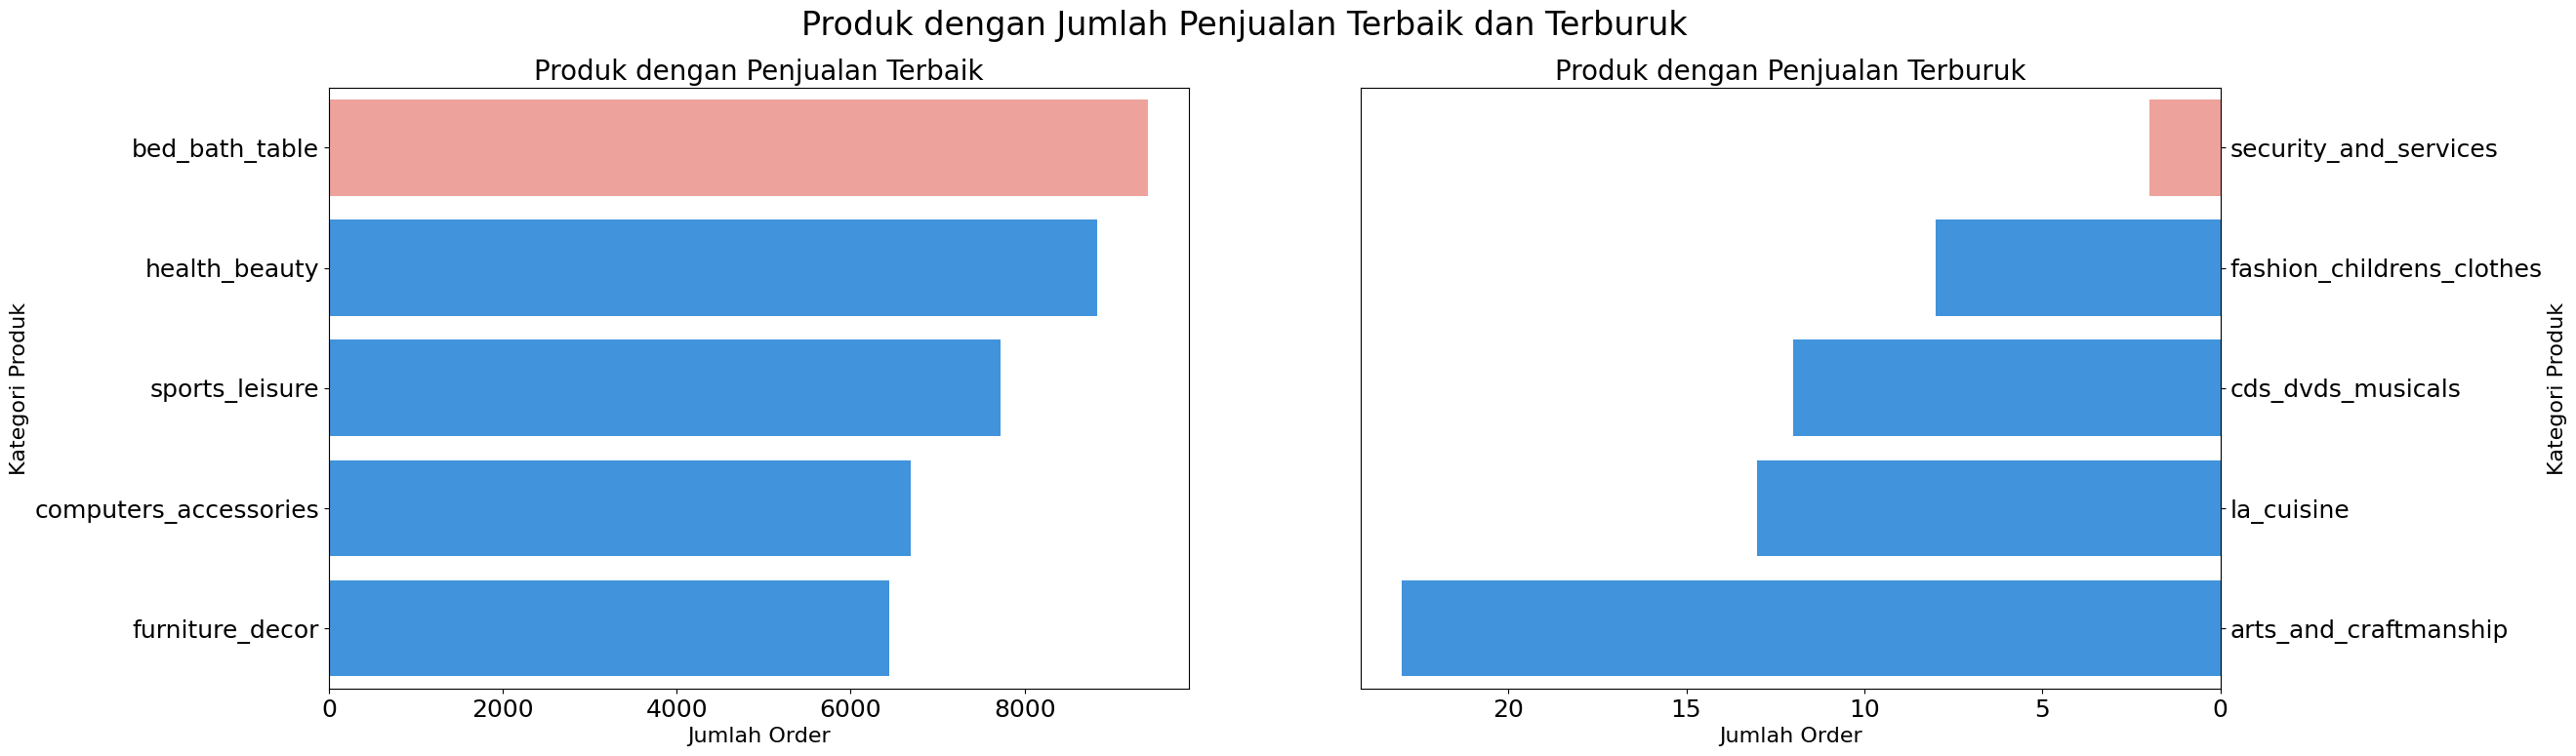

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))
colors = ["#FA968F", "#2795F5", "#2795F5", "#2795F5", "#2795F5"]

sns.barplot(
    x='total_order', y='product_category_name_english',
    data=product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=False).reset_index().head(5),
    palette=colors, ax=ax[0])
ax[0].set_ylabel('Kategori Produk', fontsize=16)
ax[0].set_xlabel('Jumlah Order', fontsize=16)
ax[0].set_title('Produk dengan Penjualan Terbaik', fontsize=20)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelsize=18)

sns.barplot(
    x='total_order', y='product_category_name_english',
    data=product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=True).reset_index().head(5),
    palette=colors, ax=ax[1])
ax[1].set_ylabel('Kategori Produk', fontsize=16)
ax[1].set_xlabel('Jumlah Order', fontsize=16)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_title('Produk dengan Penjualan Terburuk', fontsize=20)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].tick_params(axis='x', labelsize=18)

plt.suptitle('Produk dengan Jumlah Penjualan Terbaik dan Terburuk', fontsize=24)
plt.show()

**Produk dengan Penjualan Terbaik:**
1. bed_bath_table
2. health_beauty
3. sports_leisure
4. computers_accessories
5. furniture_decor


**Produk dengan Penjualan Terburuk:**
1. security_and_services
2. fashion_childrens_clothes
3. cds_dvds_musicals
4. la_cuisine
5. arts_and_craftmanship

### **Pertanyaan 2**:Kapan perusahaan mengalami penjualan tertinggi berdasarkan jumlah order? dan apakah penjualan mengalami kenaikan terus menerus dari waktu ke waktu?

In [72]:
monthly_revenue_df = revenue_by_day_df.resample(rule='M', on='order_approved_at').agg({
    'total_order': 'sum',
    'total_revenue': 'sum'
})
monthly_revenue_df.index = monthly_revenue_df.index.strftime('%Y-%m')
monthly_revenue_df = monthly_revenue_df.reset_index()

monthly_revenue_df = monthly_revenue_df[monthly_revenue_df['order_approved_at'] != monthly_revenue_df['order_approved_at'].max()]

/tmp/ipython-input-543683131.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = revenue_by_day_df.resample(rule='M', on='order_approved_at').agg({


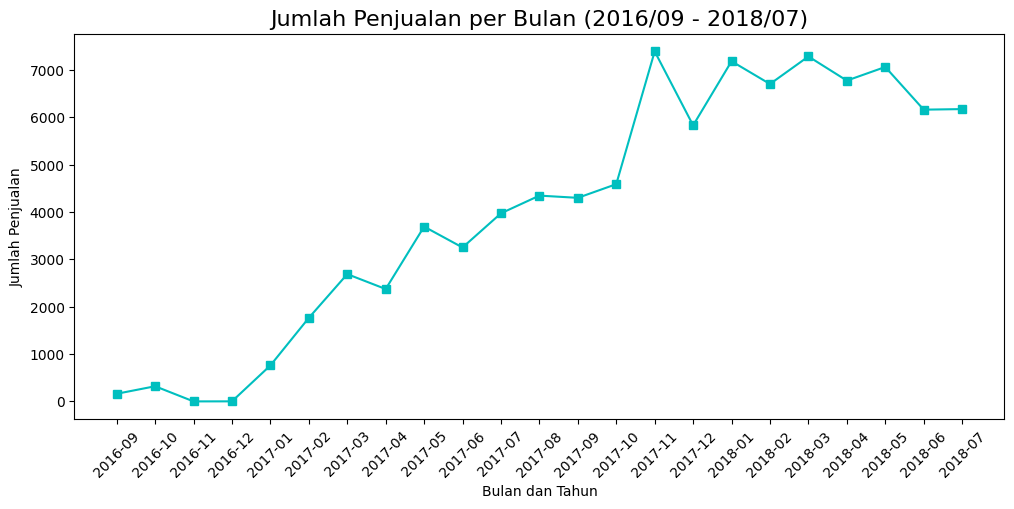

In [73]:
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue_df['order_approved_at'],
         monthly_revenue_df['total_order'],
         marker='s', color='c')
plt.title('Jumlah Penjualan per Bulan (2016/09 - 2018/07)', fontsize=16)
plt.xlabel('Bulan dan Tahun', fontsize=10)
plt.ylabel('Jumlah Penjualan', fontsize=10)
plt.xticks(rotation=45)
plt.show()

### **Pertanyaan 3:** Jumlah customer paling banyak berada di kota mana saja?

In [74]:
bystate_df = orders_customers_df.groupby("customer_city").customer_id.nunique().reset_index().sort_values(by='customer_id', ascending=False).head(5)
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,customer_city,customer_count
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


/tmp/ipython-input-655210954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


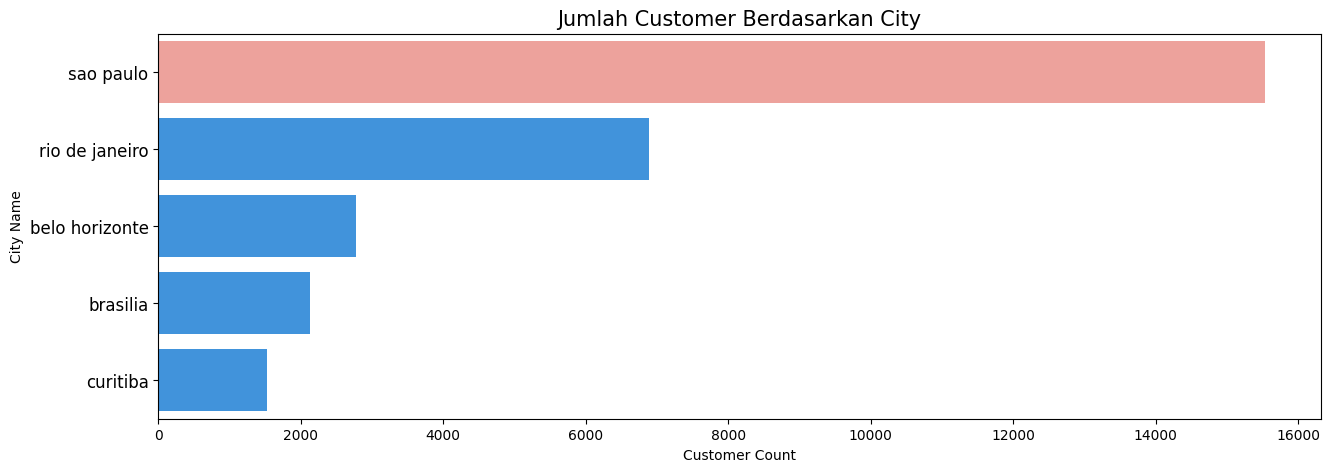

In [75]:
plt.figure(figsize=(15, 5))
colors_ = ["#FA968F", "#2795F5", "#2795F5", "#2795F5", "#2795F5"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Jumlah Customer Berdasarkan City", loc="center", fontsize=15)
plt.ylabel("City Name")
plt.xlabel("Customer Count")
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Analisis Lanjutan (Opsional)

In [76]:
rfm_df = items_orders_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-17,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-04,1,93.00


In [77]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()


,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-17,1,149.90,382
4,000379cdec625522490c315e70c7a9fb,2018-04-04,1,93.00,152


In [78]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382
4,000379cdec625522490c315e70c7a9fb,1,93.00,152


In [79]:
rfm_df.describe()

,frequency,monetary,recency
count,98666.0,98666.000000,98666.000000
mean,1.0,137.754076,245.223218
std,0.0,210.645145,153.449418
min,1.0,0.850000,0.000000
25%,1.0,45.900000,121.000000
50%,1.0,86.900000,226.000000
75%,1.0,149.900000,355.000000
max,1.0,13440.000000,718.000000


In [80]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
29063,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.0,0
76152,c4c66f47534e09a03fc7a878a9eda5ea,1,65.0,5
42327,6e353700bc7bcdf6ebc15d6de16d7002,1,45.9,5
88158,e450a297a7bc6839ceb0cf1a2377fa02,1,63.9,5
32387,54365416b7ef5599f54a6c7821d5d290,1,99.0,5


In [81]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
98665,ffffa3172527f765de70084a7e53aae8,1,21.80,366
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382


/tmp/ipython-input-1658848160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax)
/tmp/ipython-input-1658848160.py:5: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax)


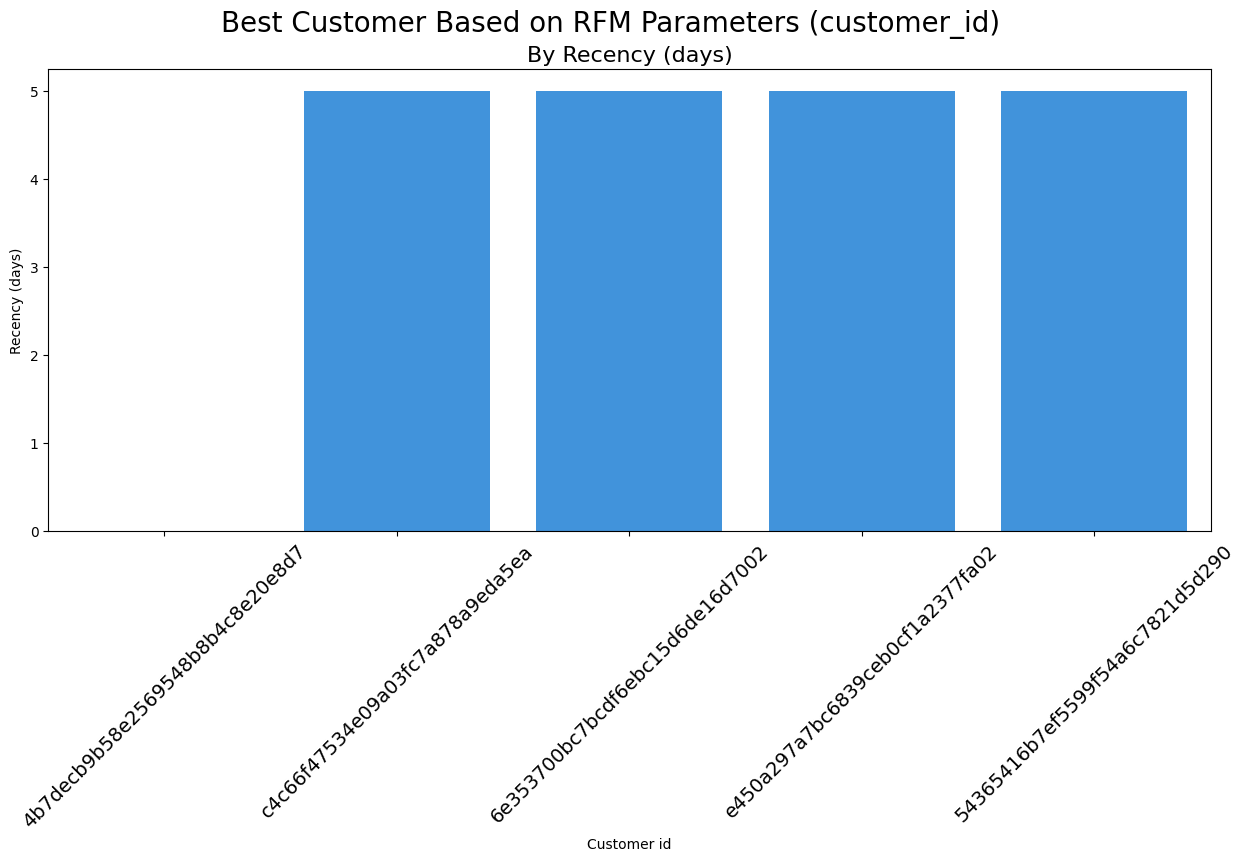

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

colors = ["#2795F5", "#2795F5", "#2795F5", "#2795F5"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax)
ax.set_ylabel("Recency (days)")
ax.set_xlabel("Customer id")
ax.set_title("By Recency (days)", loc="center", fontsize=16)
ax.tick_params(axis ='x', labelsize=14)
plt.xticks(rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

/tmp/ipython-input-2522759667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax)


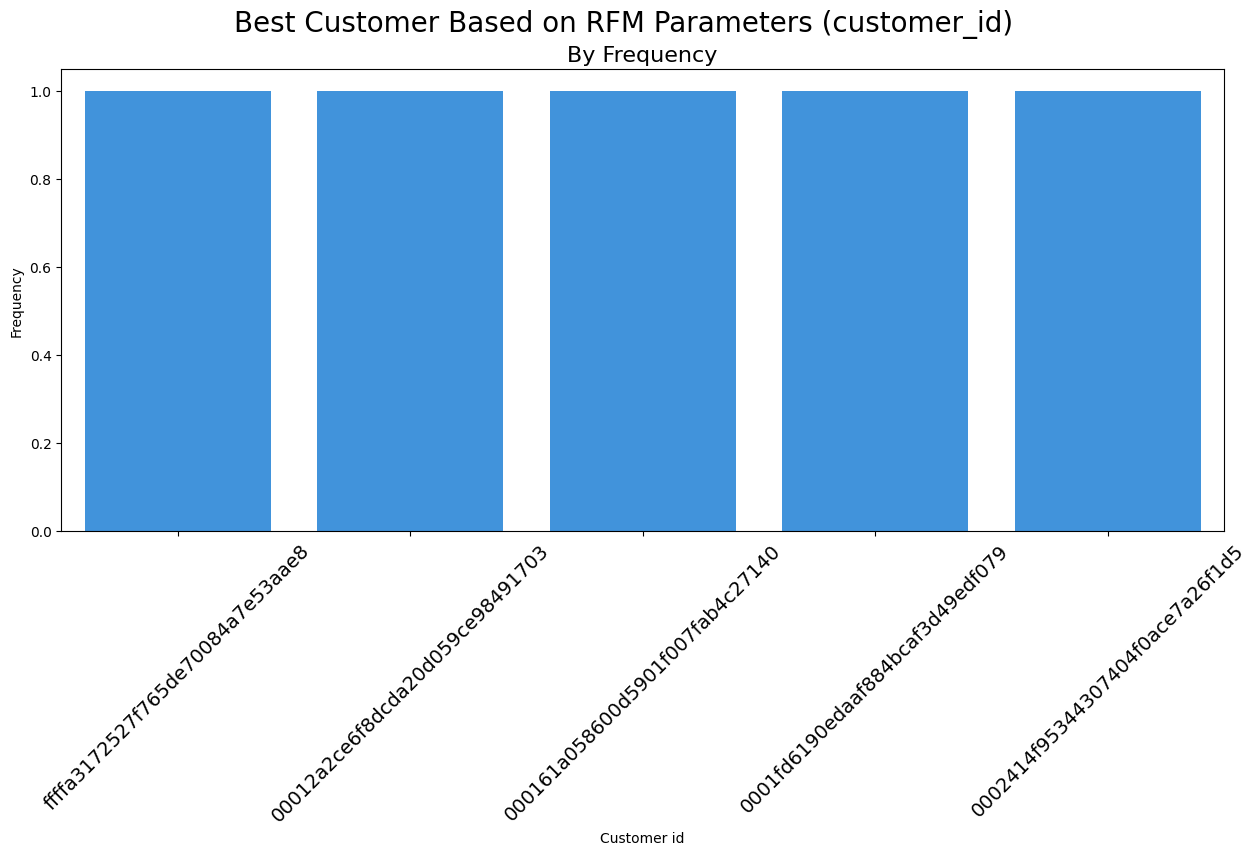

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

colors = ["#2795F5", "#2795F5", "#2795F5", "#2795F5", "#2795F5"]

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("Customer id")
ax.set_title("By Frequency", loc="center", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
plt.xticks(rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

/tmp/ipython-input-405770446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax)


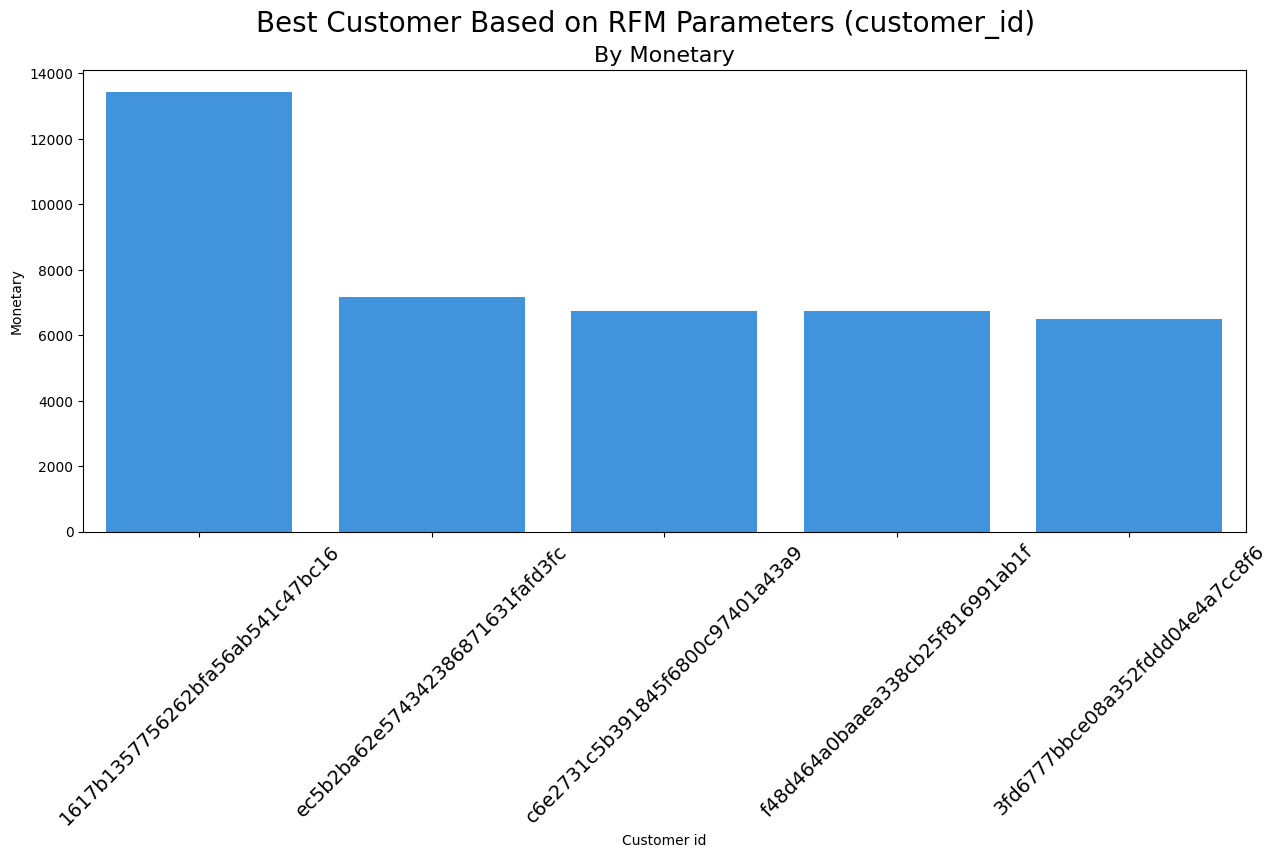

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

colors = ["#2795F5", "#2795F5", "#2795F5", "#2795F5", "#2795F5"]

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel("Monetary")
ax.set_xlabel("Customer id")
ax.set_title("By Monetary", loc="center", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
plt.xticks(rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

##Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [85]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,33815.5,49333.5,50486.5
1,000161a058600d5901f007fab4c27140,1,54.90,414,16584.5,49333.5,31312.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,2773.0,49333.5,80169.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382,20989.0,49333.5,73730.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,152,66746.0,49333.5,52932.0


In [86]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,34.272698,100.0,51.169096
1,000161a058600d5901f007fab4c27140,1,54.90,414,16.808728,100.0,31.735856
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,2.810492,100.0,81.253421
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382,21.272779,100.0,74.727363
4,000379cdec625522490c315e70c7a9fb,1,93.00,152,67.648430,100.0,53.647660


In [87]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.12
1,000161a058600d5901f007fab4c27140,2.43
2,0001fd6190edaaf884bcaf3d49edf079,3.74
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.44
5,0004164d20a9e969af783496f3408652,2.51
6,000419c5494106c306a97b5635748086,2.33


##Segmentasi customer berdasarkan RFM_score

In [88]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(15)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.12,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.74,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.44,Medium value customer
5,0004164d20a9e969af783496f3408652,2.51,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.62,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.81,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [89]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16038
1,Low value customers,41486
2,Medium value customer,34482
3,Top customers,5535
4,lost customers,1125


In [90]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

/tmp/ipython-input-185794829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


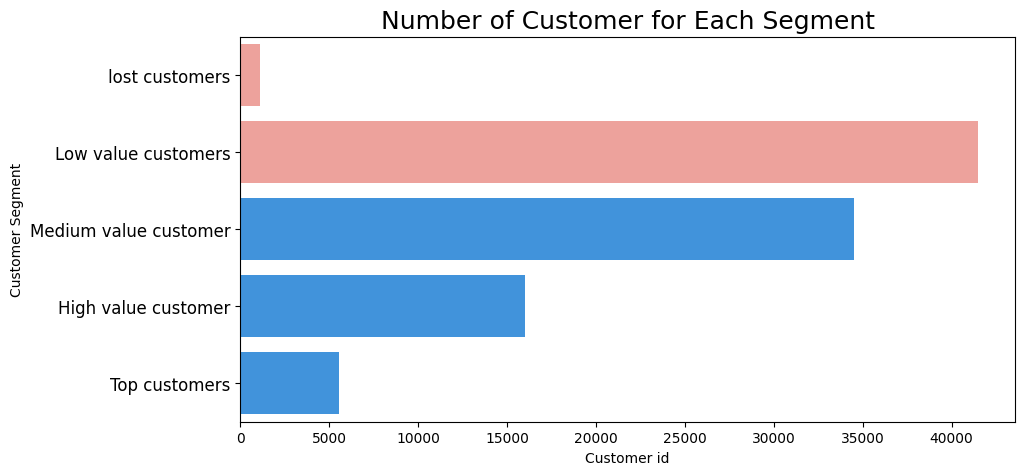

In [91]:
plt.figure(figsize=(10, 5))
colors_ = ["#FA968F", "#FA968F", "#2795F5", "#2795F5", "#2795F5"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=18)
plt.ylabel("Customer Segment")
plt.xlabel("Customer id")
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion



**1. Pertanyaan:** Kategori produk mana saja yang mendapatkan jumlah penjualan terbaik dan jumlah penjualan terburuk berdasarkan jumlah order?

  **Jawaban:**


*   **Produk dengan Penjualan Terbaik:**
1. bed_bath_table
2. health_beauty
3. sports_leisure
4. computers_accessories
5. furniture_decor



*   **Produk dengan Penjualan Terburuk:**
1. security_and_services
2. fashion_childrens_clothes
3. cds_dvds_musicals
4. la_cuisine
5. arts_and_craftmanship


**2.   Pertanyaan**: Kapan perusahaan mengalami penjualan tertinggi berdasarkan jumlah order? dan apakah penjualan mengalami kenaikan terus menerus dari waktu ke waktu?


**Jawaban:**

*   Berdasarkan grafik yang dihasilkan, dapat diketahui bahwa **penjualan tertinggi**
terjadi pada **tahun 2017 bulan November (2017-11)**.

*   Pada grafik tersebut dapat dilihat bahwa alur grafik secara sekilas mengalami kenaikan, akan tetapi ketika dilihat secara mendetail ternyata terdapat beberapa titik yang mengalami penurunan. Sehingga, dapat dikatakan penjualan toko tersebut **tidak selalu mengalami kenaikan penjualan dari tahun ke tahun.**



**3. Pertanyaan:** Jumlah customer paling banyak berada di kota mana saja?

**Jawaban:**
Berdasarkan grafik diatas dapat diketahui 5 kota yang memiliki jumlah customer tertinggi, yaitu:
*   Sao Paulo (15540)
*   Rio de Janeiro (6882)
*   Belo Horizonte (2773)
*   Brasilia (2131)
*   Curitiba (1521)